<a href="https://colab.research.google.com/github/woojin-devv/final_project/blob/main/Image_Train_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="90xz5xcoxb7aCA9EZTkC")
project = rf.workspace("yoon-pvmwt").project("opensource_final_yoon")
version = project.version(8)
dataset = version.download("yolov8")  # 폴더 생성됨

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to opensource_final_yoon-8 in yolov8:: 100%|██████████| 10116/10116 [00:01<00:00, 5249.37it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [15]:
# YAML 파일 읽기 위한 라이브러리
import yaml

# 파일 경로
yaml_path = "/content/opensource_final_yoon-8/data.yaml"

# YAML 파일 열어서 내용 출력
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# 깔끔하게 출력
from pprint import pprint
pprint(data)


{'names': ['bakedpotato',
           'bibimbap',
           'chickensteak',
           'coldsoymilknoodles',
           'crabstick',
           'eeldonburi',
           'grilledmackerel',
           'grilledribs',
           'japchae',
           'jjajangmyeon',
           'kimbap',
           'kimchifriedrice',
           'kimchistew',
           'mungbeansprouts',
           'noodles',
           'pasta',
           'roastedsweetpotato',
           'scrambledegg',
           'spinach',
           'steamedrice',
           'tunasandwich'],
 'nc': 21,
 'roboflow': {'license': 'CC BY 4.0',
              'project': 'opensource_final_yoon',
              'url': 'https://universe.roboflow.com/yoon-pvmwt/opensource_final_yoon/dataset/8',
              'version': 8,
              'workspace': 'yoon-pvmwt'},
 'test': '../test/images',
 'train': '../train/images',
 'val': '../valid/images'}


In [3]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or yolov8s.pt etc

model.train(
    data="/content/opensource_final_yoon-8/data.yaml",  # 다운로드된 YAML 경로
    epochs=100,
    imgsz=640,
    batch=16,
    name="opensource_yoon_v8"
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 143MB/s]


Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/opensource_final_yoon-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=opensource_yoon_v8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

100%|██████████| 755k/755k [00:00<00:00, 33.3MB/s]

Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    755407  ultralytics.nn.modules.head.Detect           [21, [64, 128, 256]]          
Model summary: 129 layers, 3,014,943 parameters, 3,014,927 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 143MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1607.5±565.1 MB/s, size: 64.6 KB)


train: Scanning /content/opensource_final_yoon-8/train/labels... 4419 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4419/4419 [00:02<00:00, 2145.84it/s]

train: New cache created: /content/opensource_final_yoon-8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 619.5±474.3 MB/s, size: 60.9 KB)


val: Scanning /content/opensource_final_yoon-8/valid/labels... 419 images, 1 backgrounds, 0 corrupt: 100%|██████████| 419/419 [00:00<00:00, 1276.70it/s]

val: New cache created: /content/opensource_final_yoon-8/valid/labels.cache


Plotting labels to runs/detect/opensource_yoon_v8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/opensource_yoon_v8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.16G     0.9273      3.603      1.494          9        640: 100%|██████████| 277/277 [01:28<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]


                   all        419        419      0.391      0.556      0.465      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.63G     0.8971       2.42      1.445          9        640: 100%|██████████| 277/277 [01:24<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]


                   all        419        419       0.68      0.602      0.688      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.66G      0.901      2.013      1.429          4        640: 100%|██████████| 277/277 [01:15<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.04it/s]

                   all        419        419      0.616      0.605      0.618      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.66G     0.8642      1.792      1.402          6        640: 100%|██████████| 277/277 [01:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        419        419      0.726      0.678      0.769      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.69G     0.8389      1.582      1.369          9        640: 100%|██████████| 277/277 [01:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]

                   all        419        419      0.643      0.689      0.703       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.71G     0.8131      1.475      1.351          6        640: 100%|██████████| 277/277 [01:19<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.82it/s]

                   all        419        419      0.725      0.708      0.781      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.72G     0.7956      1.362      1.343          4        640: 100%|██████████| 277/277 [01:26<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.05it/s]


                   all        419        419      0.712      0.733      0.782      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.73G     0.7718      1.286      1.316         10        640: 100%|██████████| 277/277 [01:16<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.92it/s]

                   all        419        419      0.758      0.755      0.801      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.76G     0.7568      1.205      1.302         11        640: 100%|██████████| 277/277 [01:16<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.79it/s]

                   all        419        419      0.808      0.777      0.833      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.78G     0.7534      1.158      1.298          8        640: 100%|██████████| 277/277 [01:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.78it/s]

                   all        419        419      0.812      0.775      0.824      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.79G     0.7411       1.12      1.292          8        640: 100%|██████████| 277/277 [01:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]

                   all        419        419      0.795      0.781      0.822      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.8G      0.716      1.054      1.275          8        640: 100%|██████████| 277/277 [01:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

                   all        419        419      0.832      0.767      0.826      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.83G     0.7035      1.012      1.269          4        640: 100%|██████████| 277/277 [01:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]

                   all        419        419      0.783      0.799       0.82      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.85G     0.7008     0.9884      1.255          8        640: 100%|██████████| 277/277 [01:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]

                   all        419        419      0.786      0.817      0.835      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.86G      0.689     0.9707      1.252          7        640: 100%|██████████| 277/277 [01:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]

                   all        419        419      0.768      0.799      0.812      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.87G     0.6878     0.9345      1.248         11        640: 100%|██████████| 277/277 [01:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        419        419      0.809      0.779      0.829      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.9G     0.6706     0.9081      1.237          8        640: 100%|██████████| 277/277 [01:22<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        419        419      0.815      0.774      0.846      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.91G      0.664     0.8839      1.229         10        640: 100%|██████████| 277/277 [01:22<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]

                   all        419        419       0.82      0.775      0.833      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.93G     0.6625      0.876      1.228          9        640: 100%|██████████| 277/277 [01:16<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

                   all        419        419      0.804      0.839      0.863       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.94G     0.6522     0.8363      1.222          9        640: 100%|██████████| 277/277 [01:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.96it/s]

                   all        419        419      0.849      0.794      0.851      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.96G     0.6446      0.814      1.216          6        640: 100%|██████████| 277/277 [01:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]

                   all        419        419      0.776      0.825      0.852      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.98G     0.6425     0.8096      1.212         10        640: 100%|██████████| 277/277 [01:16<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.96it/s]

                   all        419        419      0.797      0.833      0.856       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         3G      0.634     0.8011      1.206         11        640: 100%|██████████| 277/277 [01:20<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.06it/s]

                   all        419        419      0.828      0.773       0.84      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.01G      0.621      0.779      1.195          9        640: 100%|██████████| 277/277 [01:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.81it/s]

                   all        419        419      0.843      0.813      0.853       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.03G     0.6208     0.7806      1.195          6        640: 100%|██████████| 277/277 [01:16<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        419        419       0.76      0.858      0.859      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.05G     0.6182     0.7611      1.197          6        640: 100%|██████████| 277/277 [01:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.53it/s]


                   all        419        419      0.849      0.801      0.858      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.07G     0.6134     0.7512      1.194         10        640: 100%|██████████| 277/277 [01:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        419        419      0.845       0.82      0.863      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.07G     0.6043     0.7212      1.186          6        640: 100%|██████████| 277/277 [01:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.85it/s]

                   all        419        419      0.796      0.802       0.84      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       3.1G      0.604       0.71      1.182          6        640: 100%|██████████| 277/277 [01:21<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.50it/s]


                   all        419        419      0.851      0.823      0.874      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.12G     0.5898     0.6977      1.174         10        640: 100%|██████████| 277/277 [01:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        419        419      0.844      0.829      0.877      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.14G     0.5992      0.704      1.183          9        640: 100%|██████████| 277/277 [01:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.98it/s]

                   all        419        419      0.827      0.854      0.871      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.14G     0.5898     0.6869      1.168          6        640: 100%|██████████| 277/277 [01:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]

                   all        419        419       0.79      0.845      0.851      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.17G     0.5832     0.6728      1.168          6        640: 100%|██████████| 277/277 [01:22<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        419        419      0.781      0.853      0.866      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.19G     0.5788      0.672      1.163          9        640: 100%|██████████| 277/277 [01:21<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.95it/s]

                   all        419        419      0.813      0.817      0.847      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       3.2G     0.5769     0.6502      1.167          4        640: 100%|██████████| 277/277 [01:25<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]

                   all        419        419      0.823       0.82      0.864      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.21G      0.573     0.6458       1.16          8        640: 100%|██████████| 277/277 [01:19<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.94it/s]

                   all        419        419      0.827      0.855       0.86      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.24G     0.5584     0.6289       1.15         10        640: 100%|██████████| 277/277 [01:19<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]

                   all        419        419      0.803      0.855      0.868      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.26G     0.5593     0.6265      1.148          8        640: 100%|██████████| 277/277 [01:19<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        419        419      0.786      0.822      0.847      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.27G     0.5511     0.6097      1.145         10        640: 100%|██████████| 277/277 [01:19<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]

                   all        419        419      0.828      0.822      0.854      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.28G      0.551     0.6031       1.14         10        640: 100%|██████████| 277/277 [01:27<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]


                   all        419        419      0.822      0.831       0.87      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.31G      0.537     0.5855      1.128          9        640: 100%|██████████| 277/277 [01:16<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        419        419      0.871      0.811      0.864      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.32G     0.5371        0.6      1.136          7        640: 100%|██████████| 277/277 [01:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]

                   all        419        419      0.843      0.847      0.881      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.34G     0.5329      0.586      1.131          9        640: 100%|██████████| 277/277 [01:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]

                   all        419        419      0.876      0.793      0.869      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.35G     0.5236     0.5756      1.128          6        640: 100%|██████████| 277/277 [01:16<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]

                   all        419        419      0.857      0.825      0.868      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.38G     0.5275     0.5789      1.129          4        640: 100%|██████████| 277/277 [01:16<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.25it/s]

                   all        419        419      0.882      0.806      0.875      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.39G     0.5274     0.5838      1.126          6        640: 100%|██████████| 277/277 [01:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        419        419      0.877      0.789      0.863      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.41G     0.5155     0.5605       1.12          7        640: 100%|██████████| 277/277 [01:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.77it/s]

                   all        419        419      0.814      0.878      0.879      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.42G     0.5118     0.5575      1.118          5        640: 100%|██████████| 277/277 [01:19<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.76it/s]


                   all        419        419      0.858      0.824      0.863      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.44G     0.5152     0.5553      1.124          8        640: 100%|██████████| 277/277 [01:23<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]

                   all        419        419      0.819      0.845       0.87      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.46G     0.5151     0.5439      1.116         10        640: 100%|██████████| 277/277 [01:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]

                   all        419        419      0.808      0.854      0.859      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.48G     0.5116     0.5432      1.112          6        640: 100%|██████████| 277/277 [01:21<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]

                   all        419        419      0.857      0.824      0.869      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.48G      0.501     0.5278      1.109          6        640: 100%|██████████| 277/277 [01:26<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.50it/s]


                   all        419        419      0.885      0.795      0.877      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.51G     0.4945     0.5126      1.104          7        640: 100%|██████████| 277/277 [01:20<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        419        419       0.86      0.846      0.884      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.53G     0.5002     0.5217       1.11         10        640: 100%|██████████| 277/277 [01:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        419        419      0.853      0.846      0.878      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.55G     0.4922     0.5147      1.103          7        640: 100%|██████████| 277/277 [01:22<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.94it/s]

                   all        419        419      0.857      0.855      0.874      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.55G     0.5032     0.5246      1.109         10        640: 100%|██████████| 277/277 [01:23<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]

                   all        419        419      0.833      0.859      0.873      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.58G     0.4875     0.4994      1.095          8        640: 100%|██████████| 277/277 [01:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]

                   all        419        419      0.843       0.84      0.871      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.6G     0.4885     0.5062        1.1          6        640: 100%|██████████| 277/277 [01:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.86it/s]

                   all        419        419      0.869       0.82      0.879      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.62G     0.4817     0.5104      1.095          8        640: 100%|██████████| 277/277 [01:25<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        419        419      0.851      0.825      0.871      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.62G      0.478     0.4958      1.095          6        640: 100%|██████████| 277/277 [01:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]

                   all        419        419      0.829      0.844      0.884      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.65G     0.4734     0.4862      1.088         10        640: 100%|██████████| 277/277 [01:18<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.36it/s]

                   all        419        419      0.809      0.862      0.872      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.67G     0.4807      0.488      1.093          7        640: 100%|██████████| 277/277 [01:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]

                   all        419        419      0.846      0.833      0.866      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.68G     0.4717     0.4813      1.084          5        640: 100%|██████████| 277/277 [01:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]

                   all        419        419       0.87      0.834      0.882      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.69G     0.4688     0.4753      1.084          6        640: 100%|██████████| 277/277 [01:18<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        419        419      0.847      0.829      0.864      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.72G     0.4619       0.48      1.084          6        640: 100%|██████████| 277/277 [01:18<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]

                   all        419        419      0.866       0.84      0.872      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.73G     0.4672     0.4711      1.084          6        640: 100%|██████████| 277/277 [01:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

                   all        419        419      0.842       0.84      0.868      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.75G     0.4626     0.4603      1.081          6        640: 100%|██████████| 277/277 [01:22<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]

                   all        419        419      0.841      0.859      0.882      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.76G     0.4498     0.4478      1.072          9        640: 100%|██████████| 277/277 [01:23<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]

                   all        419        419       0.86      0.838      0.874      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.79G     0.4553      0.459      1.076          9        640: 100%|██████████| 277/277 [01:21<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]

                   all        419        419      0.834      0.843      0.876      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       3.8G     0.4464     0.4484      1.068         10        640: 100%|██████████| 277/277 [01:28<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        419        419      0.868      0.831      0.878      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.82G     0.4521     0.4501      1.073          7        640: 100%|██████████| 277/277 [01:28<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.80it/s]

                   all        419        419       0.87       0.83      0.879       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.83G     0.4446     0.4335       1.07          9        640: 100%|██████████| 277/277 [01:27<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.55it/s]


                   all        419        419      0.837      0.849      0.879      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.85G     0.4431     0.4351      1.067          8        640: 100%|██████████| 277/277 [01:30<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        419        419      0.859      0.845      0.885      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.87G      0.441     0.4432      1.064          8        640: 100%|██████████| 277/277 [01:32<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]

                   all        419        419      0.862      0.837      0.873      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.89G     0.4376     0.4386      1.066          7        640: 100%|██████████| 277/277 [01:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]

                   all        419        419      0.843       0.84      0.879      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.89G     0.4376     0.4317      1.064          7        640: 100%|██████████| 277/277 [01:19<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]

                   all        419        419      0.842      0.858      0.883       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.92G     0.4274     0.4285      1.065          7        640: 100%|██████████| 277/277 [01:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]

                   all        419        419      0.886      0.855      0.901      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.94G     0.4269     0.4201       1.06          6        640: 100%|██████████| 277/277 [01:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]

                   all        419        419      0.865       0.82      0.881      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.96G     0.4317     0.4202      1.062          9        640: 100%|██████████| 277/277 [01:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.10it/s]

                   all        419        419      0.834      0.853      0.879      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.96G     0.4227      0.413      1.056          4        640: 100%|██████████| 277/277 [01:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]

                   all        419        419      0.863      0.839      0.888      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.99G     0.4292     0.4178      1.062          9        640: 100%|██████████| 277/277 [01:19<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.78it/s]

                   all        419        419      0.857      0.845      0.884      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.01G     0.4257     0.4154      1.059          9        640: 100%|██████████| 277/277 [01:21<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]

                   all        419        419      0.873      0.836      0.885      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.03G     0.4248      0.413      1.058         11        640: 100%|██████████| 277/277 [01:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]

                   all        419        419      0.852      0.848      0.877      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.03G     0.4126     0.3979      1.048          7        640: 100%|██████████| 277/277 [01:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]

                   all        419        419       0.88      0.817      0.875      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.06G     0.4166     0.4003       1.05          7        640: 100%|██████████| 277/277 [01:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]

                   all        419        419      0.818      0.858      0.873      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.08G     0.4094     0.3952      1.046          7        640: 100%|██████████| 277/277 [01:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.87it/s]

                   all        419        419      0.852      0.868       0.89      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.09G     0.4083     0.4004      1.044          7        640: 100%|██████████| 277/277 [01:22<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        419        419      0.858      0.865      0.886      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.1G     0.3953     0.3887      1.037          6        640: 100%|██████████| 277/277 [01:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]


                   all        419        419      0.881      0.835      0.882      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.13G     0.3997     0.3969       1.04          7        640: 100%|██████████| 277/277 [01:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]

                   all        419        419      0.864      0.833      0.884       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.14G     0.4028     0.3848      1.046         10        640: 100%|██████████| 277/277 [01:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        419        419      0.892      0.808      0.877      0.708


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.16G     0.3866        0.3      1.103          3        640: 100%|██████████| 277/277 [01:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]

                   all        419        419      0.863      0.849      0.876      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.17G     0.3657     0.2703      1.084          3        640: 100%|██████████| 277/277 [01:15<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]

                   all        419        419      0.851      0.853       0.88      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       4.2G     0.3532     0.2651      1.064          3        640: 100%|██████████| 277/277 [01:15<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        419        419      0.851      0.854      0.875      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.21G     0.3483     0.2578      1.061          3        640: 100%|██████████| 277/277 [01:16<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]

                   all        419        419      0.845      0.851      0.877      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.23G     0.3453     0.2534      1.061          3        640: 100%|██████████| 277/277 [01:16<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]


                   all        419        419      0.825      0.871      0.879      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.24G     0.3417     0.2464      1.056          3        640: 100%|██████████| 277/277 [01:14<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        419        419      0.814      0.882      0.874      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.26G     0.3358     0.2473      1.047          2        640: 100%|██████████| 277/277 [01:15<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        419        419      0.837      0.845      0.875      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.28G     0.3359     0.2424      1.049          3        640: 100%|██████████| 277/277 [01:14<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]


                   all        419        419      0.828      0.857      0.873      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       4.3G     0.3272     0.2396      1.044          3        640: 100%|██████████| 277/277 [01:14<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]

                   all        419        419       0.84      0.853      0.877      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       4.3G      0.329     0.2364      1.043          3        640: 100%|██████████| 277/277 [01:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.80it/s]


                   all        419        419       0.85      0.835      0.874      0.704

100 epochs completed in 2.343 hours.
Optimizer stripped from runs/detect/opensource_yoon_v8/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/opensource_yoon_v8/weights/best.pt, 6.3MB

Validating runs/detect/opensource_yoon_v8/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]


                   all        419        419      0.885      0.854        0.9      0.723
           bakedpotato         21         21      0.756      0.571      0.708      0.556
              bibimbap         23         23      0.913          1      0.988       0.74
          chickensteak         13         13      0.895       0.66      0.832      0.665
    coldsoymilknoodles         23         23          1      0.931      0.989      0.917
             crabstick         22         22      0.894      0.765      0.811      0.606
            eeldonburi         19         19      0.911      0.842      0.937      0.771
       grilledmackerel         20         20      0.872       0.68      0.793      0.634
           grilledribs         19         19      0.825          1      0.974      0.715
               japchae         20         20      0.987          1      0.995        0.9
          jjajangmyeon         29         29      0.982      0.966      0.991      0.906
                kimba

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79a47fd8cf10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

Saving 01_016_01016020_160377677472814_0.jpeg to 01_016_01016020_160377677472814_0.jpeg

🖼️ 업로드한 파일: 01_016_01016020_160377677472814_0.jpeg

image 1/1 /content/01_016_01016020_160377677472814_0.jpeg: 480x640 1 kimbap, 10.8ms
Speed: 3.7ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
🔍 탐지된 클래스 및 개수: {'kimbap': 1}


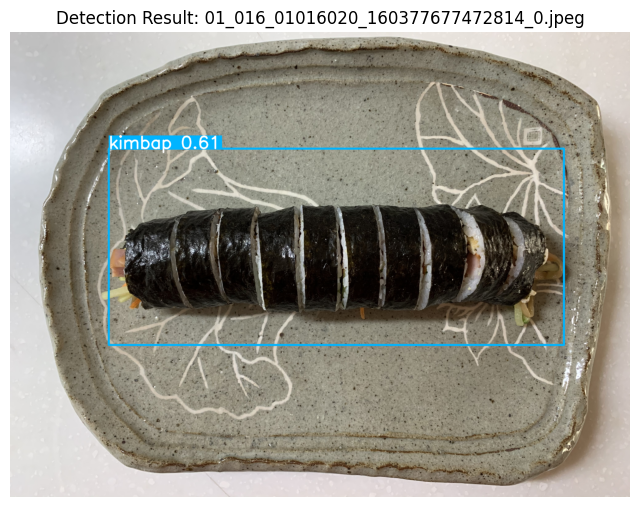

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

# 1. 모델 로드 (경로는 상황에 따라 수정하세요)
model = YOLO('/content/runs/detect/opensource_yoon_v8/weights/best.pt')

# 2. 이미지 업로드 창 표시
uploaded = files.upload()

# 3. 업로드된 각 이미지에 대해 탐지 수행
for img_name in uploaded.keys():
    print(f"\n🖼️ 업로드한 파일: {img_name}")

    # 4. 탐지 실행
    results = model(img_name)

    # 5. 탐지 클래스 출력
    detected = {}
    for result in results:
        class_ids = result.boxes.cls.cpu().numpy().astype(int)
        for cid in class_ids:
            cname = model.names[cid]
            detected[cname] = detected.get(cname, 0) + 1

    print(f"🔍 탐지된 클래스 및 개수: {detected}")

    # 6. 시각화
    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f'Detection Result: {img_name}')
    plt.show()


Saving 01_014_01014001_160351288672788_1.jpg to 01_014_01014001_160351288672788_1 (1).jpg

🖼️ 업로드한 파일: 01_014_01014001_160351288672788_1 (1).jpg

image 1/1 /content/01_014_01014001_160351288672788_1 (1).jpg: 640x640 1 kimchifriedrice, 7.6ms
Speed: 4.1ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
🔍 탐지된 클래스 및 개수: {'kimchifriedrice': 1}


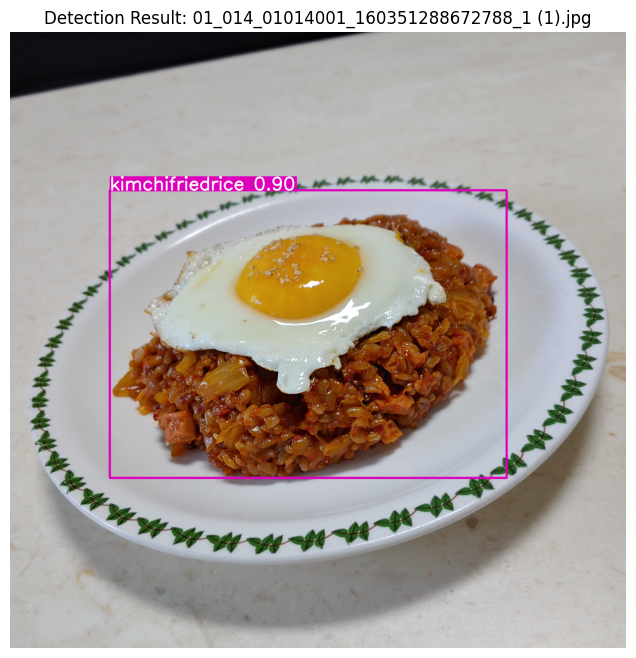

In [13]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

# 1. 모델 로드 (경로는 상황에 따라 수정하세요)
model = YOLO('/content/runs/detect/opensource_yoon_v8/weights/best.pt')

# 2. 이미지 업로드 창 표시
uploaded = files.upload()

# 3. 업로드된 각 이미지에 대해 탐지 수행
for img_name in uploaded.keys():
    print(f"\n🖼️ 업로드한 파일: {img_name}")

    # 4. 탐지 실행
    results = model(img_name)

    # 5. 탐지 클래스 출력
    detected = {}
    for result in results:
        class_ids = result.boxes.cls.cpu().numpy().astype(int)
        for cid in class_ids:
            cname = model.names[cid]
            detected[cname] = detected.get(cname, 0) + 1

    print(f"🔍 탐지된 클래스 및 개수: {detected}")

    # 6. 시각화
    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f'Detection Result: {img_name}')
    plt.show()

Saving Group 56.png to Group 56.png

🖼️ 업로드한 파일: Group 56.png

image 1/1 /content/Group 56.png: 640x640 1 bibimbap, 1 kimbap, 1 kimchifriedrice, 1 tunasandwich, 7.5ms
Speed: 4.9ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
🔍 탐지된 클래스 및 개수: {'kimbap': 1, 'kimchifriedrice': 1, 'bibimbap': 1, 'tunasandwich': 1}


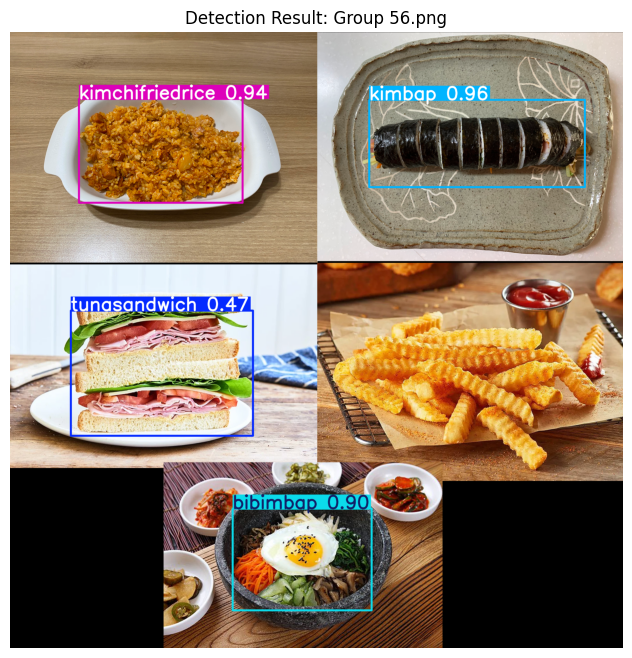

In [14]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

# 1. 모델 로드 (경로는 상황에 따라 수정하세요)
model = YOLO('/content/runs/detect/opensource_yoon_v8/weights/best.pt')

# 2. 이미지 업로드 창 표시
uploaded = files.upload()

# 3. 업로드된 각 이미지에 대해 탐지 수행
for img_name in uploaded.keys():
    print(f"\n🖼️ 업로드한 파일: {img_name}")

    # 4. 탐지 실행
    results = model(img_name)

    # 5. 탐지 클래스 출력
    detected = {}
    for result in results:
        class_ids = result.boxes.cls.cpu().numpy().astype(int)
        for cid in class_ids:
            cname = model.names[cid]
            detected[cname] = detected.get(cname, 0) + 1

    print(f"🔍 탐지된 클래스 및 개수: {detected}")

    # 6. 시각화
    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f'Detection Result: {img_name}')
    plt.show()